# **NLP Mini Project: Relationship Extraction and Visualization on Harray potter books**

### **1. Importing the necessary libraries**

In [1]:
import re
import os
import nltk
from tqdm import tqdm
import spacy
import string
import time
import logging
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd
from spacy import displacy
from selenium import webdriver
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords 
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

%matplotlib inline
sns.set_style('darkgrid')

### **2. Scraping the list of characters in the HP books**

In [6]:
webdriver_service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service = webdriver_service)

page_url = 'https://fantasytopics.com/harry-potter-characters-list/'
driver.get(page_url)

In [76]:
names_list = driver.find_elements(by=By.CLASS_NAME, value='has-text-align-center')
final_names = []

for name in names_list:
    if len(name.text)>1:
        final_names.append(name.text)

In [83]:
character_df = pd.DataFrame(final_names)
character_df.to_csv('characters.csv')
character_df.head()

,0
0,Hannah Abbott
1,Aragog
2,Ludo Bagman
3,Bathilda Bagshot
4,Bane (Centaur)


### **3. Exploratory Data Analysis**

In [48]:
Bookfile = [] 

# Loops through importing 7 HP text files - Book 1 creates table, Books 2-7 append to Book 1 table
for i in range(1,8): 
    Bookfile.append('HPBook'+str(i)+'.txt')
    FileLoc = "C://Users/aseem/Downloads/Final Year/NLP/Harry-Potter/Book_Text/{}".format(Bookfile[i-1])
    if i == 1:
        df = pd.read_csv(FileLoc, sep="@")
    else:
        df2 = pd.read_csv(FileLoc, sep="@")
        df = pd.concat([df, df2])

In [49]:
nltk.download('punkt') 
stopwords = set(stopwords.words('english')) 

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aseem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
df['WordCountText'] = df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

df.reset_index()

,index,Text,Chapter,Book,WordCountText,WordCount
0,0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",1,1,"[the, boy, who, lived, mr, and, mrs, dursley, ...",4591
1,1,THE VANISHING GLASS Nearly ten years had pass...,2,1,"[the, vanishing, glass, nearly, ten, years, ha...",3445
2,2,THE LETTERS FROM NO ONE The escape of the Bra...,3,1,"[the, letters, from, no, one, the, escape, of,...",3842
3,3,THE KEEPER OF THE KEYS BOOM. They knocked aga...,4,1,"[the, keeper, of, the, keys, boom, they, knock...",3690
4,4,DIAGON ALLEY Harry woke early the next mornin...,5,1,"[diagon, alley, harry, woke, early, the, next,...",6570
...,...,...,...,...,...,...
195,32,"Harry remained kneeling at Snape's side, simpl...",33,7,"[harry, remained, kneeling, at, snapes, side, ...",7930
196,33,"Finally, the truth. Lying with his face presse...",34,7,"[finally, the, truth, lying, with, his, face, ...",3762
197,34,"He lay facedown, listening to the silence. He ...",35,7,"[he, lay, facedown, listening, to, the, silenc...",4846
198,35,He was flying facedown on the ground again. Th...,36,7,"[he, was, flying, facedown, on, the, ground, a...",6943


C:\Users\aseem\anaconda3\envs\cal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

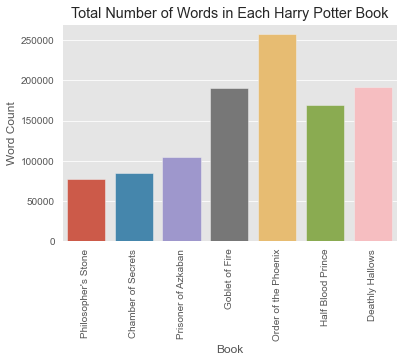

<Figure size 1440x720 with 0 Axes>

In [51]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].sum().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].sum().reset_index()['WordCount']
x_pos = np.arange(len(x))
sns.barplot(x_pos, y)
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Total Number of Words in Each Harry Potter Book")
plt.xticks(x_pos, BookTitles, rotation=90)
plt.figure(figsize=(20,10))

C:\Users\aseem\anaconda3\envs\cal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x2830bb68fd0>,
 [Text(0, 0, "Philosopher's Stone"),
  Text(1, 0, 'Chamber of Secrets'),
  Text(2, 0, 'Prisoner of Azkaban'),
  Text(3, 0, 'Goblet of Fire'),
  Text(4, 0, 'Order of the Phoenix'),
  Text(5, 0, 'Half Blood Prince'),
  Text(6, 0, 'Deathly Hallows')])

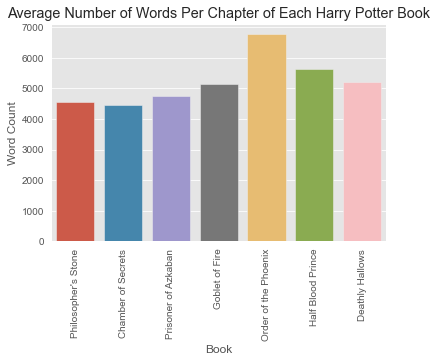

In [52]:
x = df.groupby(['Book'])['WordCount'].mean().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].mean().reset_index()['WordCount']
x_pos = np.arange(len(x))
plt.style.use('ggplot')
sns.barplot(x_pos, y)
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Average Number of Words Per Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles, rotation=90)

In [ ]:
Bookfile = [] 

# Loops through importing 7 HP text files - Book 1 creates table, Books 2-7 append to Book 1 table
for i in range(1,8): 
    Bookfile.append('HPBook'+str(i)+'.txt')
    FileLoc = "C://Users/aseem/Downloads/Final Year/NLP/Harry-Potter/Book_Text/{}".format(Bookfile[i-1])
    if i == 1:
        df = pd.read_csv(FileLoc, sep="@")
    else:
        df2 = pd.read_csv(FileLoc, sep="@")
        df = pd.concat([df, df2])

In [ ]:
nltk.download('punkt') 
stopwords = set(stopwords.words('english')) 

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

In [ ]:
df['WordCountText'] = df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

df.reset_index()

In [ ]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].sum().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].sum().reset_index()['WordCount']
x_pos = np.arange(len(x))
sns.barplot(x_pos, y)
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Total Number of Words in Each Harry Potter Book")
plt.xticks(x_pos, BookTitles, rotation=90)
plt.figure(figsize=(20,10))

In [ ]:
x = df.groupby(['Book'])['WordCount'].mean().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].mean().reset_index()['WordCount']
x_pos = np.arange(len(x))
plt.style.use('ggplot')
sns.barplot(x_pos, y)
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Average Number of Words Per Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles, rotation=90)

### **4. Prepping the Characters**

In [2]:
character_df = pd.read_csv("characters.csv")
character_df.rename(columns = {'0':'character'}, inplace = True)
character_df.head()

,Unnamed: 0,character
0,0,Hannah Abbott
1,1,Aragog
2,2,Ludo Bagman
3,3,Bathilda Bagshot
4,4,Bane (Centaur)


In [3]:
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])
character_df = character_df[["character", "character_firstname"]]
character_df.head(10)

,character,character_firstname
0,Hannah Abbott,Hannah
1,Aragog,Aragog
2,Ludo Bagman,Ludo
3,Bathilda Bagshot,Bathilda
4,Bane,Bane
5,Bloody Baron,Bloody
6,Beedle the Bard,Beedle
7,Katie Bell,Katie
8,Cuthbert Binns,Cuthbert
9,Phineas Nigellus Black,Phineas


In [4]:
indice_dumbeldore = character_df[character_df['character'].str.contains('Dumbledore')].index
indice_snape = character_df[character_df['character'].str.contains('Snape')].index
indice_hagrid = character_df[character_df['character'].str.contains('Hagrid')].index
indice_voldemort = character_df[character_df['character'].str.contains('Voldemort')].index
indice_malfoy = character_df[character_df['character'].str.contains('Malfoy')].index

print(indice_dumbeldore)
print(indice_snape)
print(indice_hagrid)
print(indice_voldemort)
print(indice_malfoy)

Int64Index([43, 44, 45, 46, 47], dtype='int64')
Int64Index([166], dtype='int64')
Int64Index([84], dtype='int64')
Int64Index([182], dtype='int64')
Int64Index([107, 108, 109, 110], dtype='int64')


In [5]:
character_df.loc[44, 'character_firstname'] = 'Dumbledore'
character_df.loc[166, 'character_firstname'] = 'Snape'
character_df.loc[84, 'character_firstname'] = 'Hagrid'
character_df.loc[182, 'character_firstname'] = 'Voldemort'
character_df.loc[107, 'character_firstname'] = 'Malfoy'

### **5. Using NER**

In [6]:
NER = spacy.load("en_core_web_sm")
all_books = [b for b in os.scandir('Harry-Potter/Book_Text') if '.txt' in b.name]

In [7]:
all_books

[<DirEntry 'HPBook1.txt'>,
 <DirEntry 'HPBook2.txt'>,
 <DirEntry 'HPBook3.txt'>,
 <DirEntry 'HPBook4.txt'>,
 <DirEntry 'HPBook5.txt'>,
 <DirEntry 'HPBook6.txt'>,
 <DirEntry 'HPBook7.txt'>]

In [8]:
%%time
NER.max_length = 2000000

book = all_books[0]
book_text = open(book).read()
book_doc = NER(book_text)

CPU times: total: 8.72 s
Wall time: 14.6 s


In [9]:
displacy.render(book_doc[0:500], style="ent", jupyter=True)

### **6. Extracting and Filtering Entities**

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in tqdm(book_doc.sents, "Progress"):
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

Progress: 5332it [00:48, 110.49it/s]


In [11]:
sent_entity_df1 = sent_entity_df

In [12]:
sent_entity_df.head(10)

,sentence,entities
0,"("", Text""@""Chapter""@""Book, "", \n, "", THE, BOY,...","[Text""@""Chapter""@""Book, THE BOY WHO, LIVED, Du..."
1,"(They, were, the, last, people, you, 'd, expec...",[]
2,"(Mr., Dursley, was, the, director, of, a, firm...","[Dursley, Grunnings]"
3,"(He, was, a, big, ,, beefy, man, with, hardly,...",[]
4,"(Mrs., Dursley, was, thin, and, blonde, and, h...",[Dursley]
5,"(The, Dursleys, had, a, small, son, called, Du...","[Dursleys, Dudley]"
6,"(The, Dursleys, had, everything, they, wanted,...",[]
7,"(They, did, n't, think, they, could, bear, it,...",[Potters]
8,"(Mrs., Potter, was, Mrs., Dursley, 's, sister,...","[Potter, Dursley, several years, Dursley]"
9,"(The, Dursleys, shuddered, to, think, what, th...","[Dursleys, Potters]"


In [13]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character_firstname)]

In [14]:
filter_entity(["Harry", "Aseem", "2"], character_df)

['Harry']

In [15]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
5,"(The, Dursleys, had, a, small, son, called, Du...","[Dursleys, Dudley]",[Dudley]
11,"(This, boy, was, another, good, reason, for, k...","[Potters, Dudley]",[Dudley]
13,"(Mr., Dursley, hummed, as, he, picked, out, hi...","[Dursley, Dursley, Dudley]",[Dudley]
15,"(At, half, past, eight, ,, Mr., Dursley, picke...","[Dursley, Dursley, Dudley, Dudley]","[Dudley, Dudley]"
61,"(He, was, sure, there, were, lots, of, people,...",[Harry],[Harry]
62,"(Come, to, think, of, it, ,, he, was, n't, eve...",[Harry],[Harry]
92,"(She, told, him, over, dinner, all, about, Mrs...","[Next Door, Dudley, \""Won't!\]",[Dudley]
94,"(When, Dudley, had, been, put, to, bed, ,, he,...","[Dudley, evening]",[Dudley]
111,"(\""Er, --, Petunia, ,, dear, --, you, have, n'...",[Petunia],[Petunia]
123,"(Instead, he, said, ,, as, casually, as, he, c...","[Dudley, Dursley]",[Dudley]


### **7. Creating Relationships**

In [16]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicate characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [17]:
relationship_df = pd.DataFrame(relationships)
pd.set_option('display.max_rows', None)
relationship_df.head(20)

,source,target
0,Dumbledore,Voldemort
1,Dumbledore,Voldemort
2,Dumbledore,Voldemort
3,Dumbledore,Voldemort
4,Voldemort,Dumbledore
5,Voldemort,Dumbledore
6,Voldemort,Dumbledore
7,Voldemort,Dumbledore
8,Voldemort,Dumbledore
9,Voldemort,Dumbledore


In [18]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df.head(10)

,source,target
0,Dumbledore,Voldemort
1,Dumbledore,Voldemort
2,Dumbledore,Voldemort
3,Dumbledore,Voldemort
4,Dumbledore,Voldemort
5,Dumbledore,Voldemort
6,Dumbledore,Voldemort
7,Dumbledore,Voldemort
8,Dumbledore,Voldemort
9,Dumbledore,Voldemort


In [19]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [20]:
print(len(relationship_df))
relationship_df.head(10)

152


,source,target,value
0,Dumbledore,Voldemort,36
1,Godric,Voldemort,6
2,Godric,Lily,4
3,Dumbledore,Lily,4
4,Dumbledore,James,5
5,Albus,James,3
6,Albus,Dumbledore,6
7,Dumbledore,Harry,377
8,Harry,Voldemort,95
9,Hagrid,Harry,931


### **8. Graph Vizualization**

In [21]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

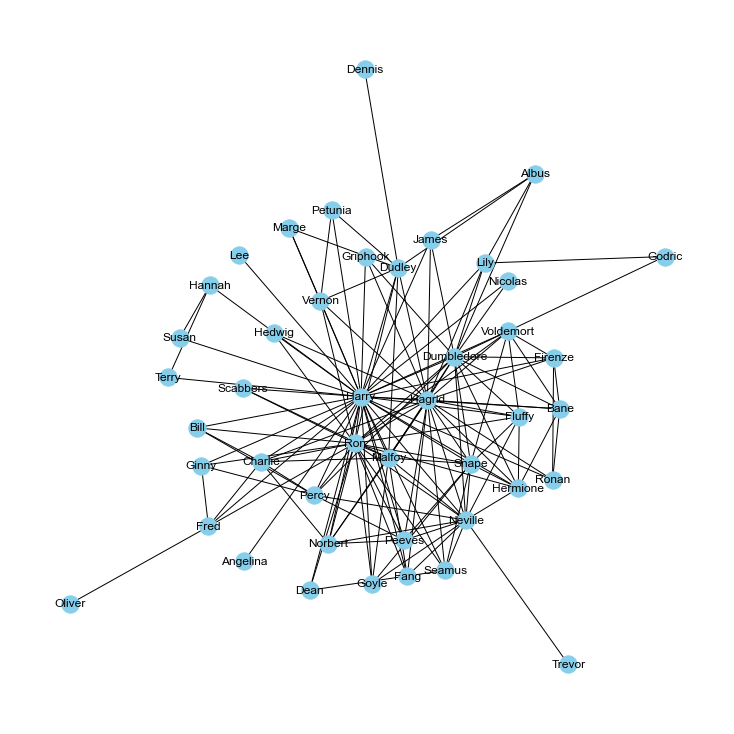

In [22]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [23]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("harry.html")

harry.html


In [24]:
dict(G.degree)

{'Dumbledore': 17,
 'Voldemort': 9,
 'Godric': 2,
 'Lily': 5,
 'James': 4,
 'Albus': 4,
 'Harry': 38,
 'Hagrid': 23,
 'Dudley': 9,
 'Petunia': 3,
 'Vernon': 6,
 'Dennis': 1,
 'Marge': 3,
 'Griphook': 3,
 'Hedwig': 3,
 'Ginny': 4,
 'Percy': 8,
 'Fred': 5,
 'Ron': 24,
 'Lee': 1,
 'Bill': 4,
 'Charlie': 8,
 'Neville': 15,
 'Scabbers': 3,
 'Malfoy': 12,
 'Goyle': 5,
 'Hermione': 8,
 'Hannah': 3,
 'Susan': 2,
 'Terry': 2,
 'Seamus': 6,
 'Snape': 12,
 'Peeves': 7,
 'Fang': 5,
 'Dean': 3,
 'Oliver': 1,
 'Angelina': 1,
 'Fluffy': 8,
 'Norbert': 7,
 'Ronan': 4,
 'Bane': 7,
 'Firenze': 6,
 'Trevor': 1,
 'Nicolas': 2}

In [25]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Dumbledore': 0.3953488372093023,
 'Voldemort': 0.20930232558139533,
 'Godric': 0.046511627906976744,
 'Lily': 0.11627906976744186,
 'James': 0.09302325581395349,
 'Albus': 0.09302325581395349,
 'Harry': 0.8837209302325582,
 'Hagrid': 0.5348837209302325,
 'Dudley': 0.20930232558139533,
 'Petunia': 0.06976744186046512,
 'Vernon': 0.13953488372093023,
 'Dennis': 0.023255813953488372,
 'Marge': 0.06976744186046512,
 'Griphook': 0.06976744186046512,
 'Hedwig': 0.06976744186046512,
 'Ginny': 0.09302325581395349,
 'Percy': 0.18604651162790697,
 'Fred': 0.11627906976744186,
 'Ron': 0.5581395348837209,
 'Lee': 0.023255813953488372,
 'Bill': 0.09302325581395349,
 'Charlie': 0.18604651162790697,
 'Neville': 0.3488372093023256,
 'Scabbers': 0.06976744186046512,
 'Malfoy': 0.27906976744186046,
 'Goyle': 0.11627906976744186,
 'Hermione': 0.18604651162790697,
 'Hannah': 0.06976744186046512,
 'Susan': 0.046511627906976744,
 'Terry': 0.046511627906976744,
 'Seamus': 0.13953488372093023,
 'Snape': 0.2

<AxesSubplot:>

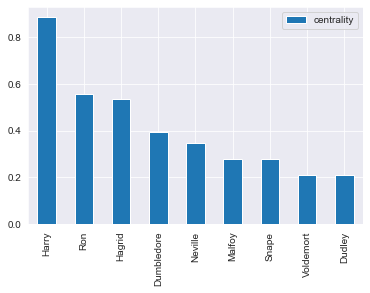

In [26]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

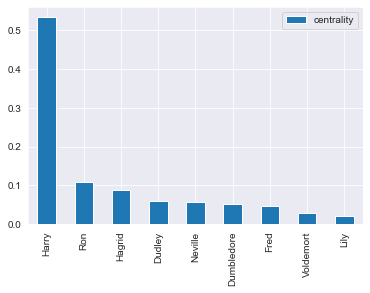

In [27]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

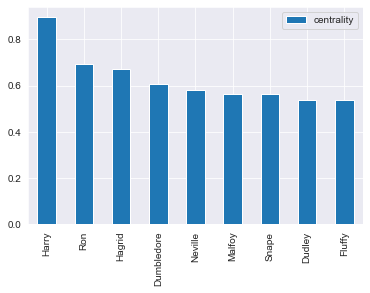

In [28]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [29]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### **9. Community Vizualization**

In [30]:
import community.community_louvain as community_louvain

In [31]:
communities = community_louvain.best_partition(G)
communities

{'Dumbledore': 1,
 'Voldemort': 1,
 'Godric': 1,
 'Lily': 1,
 'James': 1,
 'Albus': 1,
 'Harry': 0,
 'Hagrid': 1,
 'Dudley': 0,
 'Petunia': 0,
 'Vernon': 0,
 'Dennis': 0,
 'Marge': 0,
 'Griphook': 1,
 'Hedwig': 2,
 'Ginny': 2,
 'Percy': 2,
 'Fred': 2,
 'Ron': 2,
 'Lee': 0,
 'Bill': 2,
 'Charlie': 2,
 'Neville': 3,
 'Scabbers': 0,
 'Malfoy': 3,
 'Goyle': 3,
 'Hermione': 1,
 'Hannah': 0,
 'Susan': 0,
 'Terry': 0,
 'Seamus': 3,
 'Snape': 3,
 'Peeves': 3,
 'Fang': 3,
 'Dean': 0,
 'Oliver': 2,
 'Angelina': 0,
 'Fluffy': 1,
 'Norbert': 3,
 'Ronan': 1,
 'Bane': 1,
 'Firenze': 1,
 'Trevor': 3,
 'Nicolas': 0}

In [32]:
nx.set_node_attributes(G, communities, 'group')

In [33]:
com_net = Network(notebook = True, width="1500px", height="1000px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_="physics")
com_net.show("harry_community1.html")

harry_community1.html


In [ ]:
1: ['Dumbledore', 'Voldemort', 'Godric', 'Lily', 'James', 'Albus', 'Hagrid', 'Griphook', 'Fluffy', 'Ronan', 'Bane', 'Firenze'], 
0: ['Harry', 'Dudley', 'Petunia', 'Vernon', 'Dennis', 'Marge', 'Lee', 'Hannah', 'Susan', 'Terry', 'Scabbers', 'Angelina']
2: ['Hedwig', 'Ginny', 'Percy', 'Fred', 'Ron', 'Bill', 'Charlie', 'Oliver'], 
3: ['Neville', 'Malfoy', 'Goyle', 'Seamus', 'Snape', 'Peeves', 'Fang', 'Norbert', 'Trevor']}